In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from copy import deepcopy
# Load data
inp = [[int(x) for x in list(l)] for l in open("input.txt").read().splitlines()]

# Visualization
> Some rendering of the input data

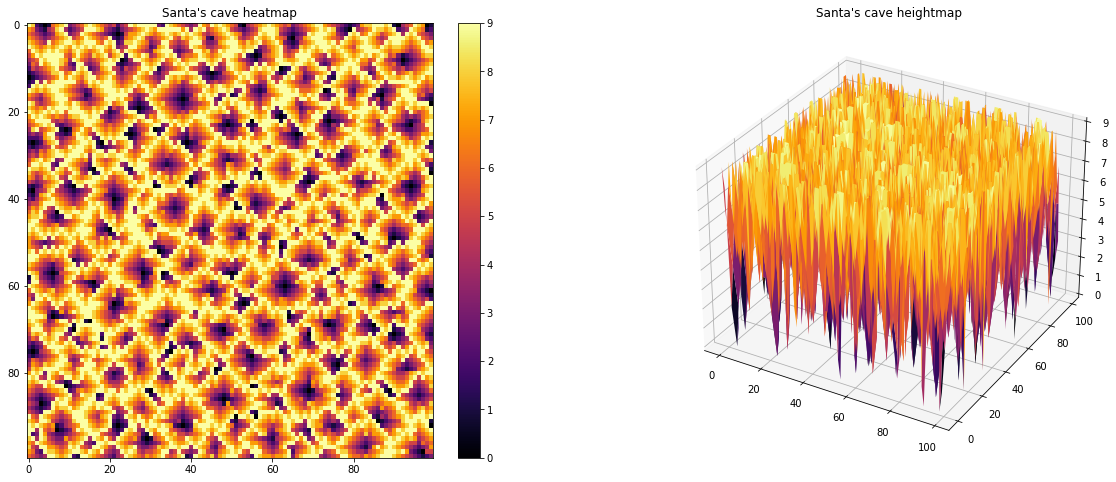

In [30]:
f = plt.figure(figsize=(20,8))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122, projection='3d')
# 2D Heatmap
ax1.set_title('Santa\'s cave heatmap')
p = ax1.imshow(inp, aspect='auto', cmap=cm.inferno)
plt.colorbar(p, ax=ax1)

# 3D Mesh
ax2.set_title('Santa\'s cave heightmap')
x, y = np.meshgrid(range(len(inp[0])), range(len(inp)))
z = np.asarray(inp)
ax2.plot_surface(x, y, z, cmap=cm.inferno)

plt.show()

## Part 1
> In the output values, how many times do digits 1, 4, 7, or 8 appear?

In [31]:
def is_min(inp, x, y):
    v = inp[y][x]
    return (True if x-1 < 0 else inp[y][x-1] > v) and \
            (True if x+1 >= len(inp[y]) else inp[y][x+1] > v) and \
            (True if y-1 < 0 else inp[y-1][x] > v) and \
            (True if y+1 >= len(inp) else inp[y+1][x] > v)
result = sum([x for s in [[inp[y][x]+1 if is_min(inp, x, y) else None for x in range(len(inp[y]))] for y in range(len(inp))] for x in s if x is not None])
print(result)

468


## Part 2
> What do you get if you multiply together the sizes of the three largest basins?

In [32]:
def calc_basin(x, y, l) -> int:    
    l[y][x] = 9
    return 1 + sum([calc_basin(x+mx,y+my,l) for mx, my in [(0,-1),(-1,0),(1,0),(0,1)] if (0 <= (x+mx) < len(l[y])) and (0 <= (y+my) < len(l)) and (l[y+my][x+mx] != 9)])
            
min_pos = [x for s in [[(x,y) if is_min(inp, x, y) else None for x in range(len(inp[y]))] for y in range(len(inp))] for x in s if x is not None]
result = np.prod(np.sort([calc_basin(x, y, deepcopy(inp)) for x, y in min_pos])[-3:])
print(result)

1280496


# Part 2 - Short

In [33]:
def calc_basin(x, y, l) -> int:    
    l[y][x] = 9
    return 1 + sum([calc_basin(x+mx,y+my,l) for mx, my in [(0,-1),(-1,0),(1,0),(0,1)] if (0 <= (x+mx) < len(l[y])) and (0 <= (y+my) < len(l)) and (l[y+my][x+mx] != 9)])    
np.prod(np.sort([calc_basin(x, y, [[int(x) for x in list(l)] for l in open("input.txt").read().splitlines()]) for x, y in [x for s in [[(x,y) if is_min(inp, x, y) else None for x in range(len(inp[y]))] for y in range(len(inp))] for x in s if x is not None]])[-3:])

1280496